In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import sklearn
from sklearn.metrics import accuracy_score

In [11]:
wine = pd.read_csv("/Users/raunavsharma/Downloads/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv", delimiter = ",")

In [51]:
x = wine.drop("Wine", axis = 1)
y = wine['Wine']

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [59]:
from sklearn.neural_network import MLPClassifier
my_model = MLPClassifier(max_iter=1000, activation = 'tanh', solver = 'lbfgs')

In [61]:
from sklearn.model_selection import KFold
scores1 = []
kf = KFold(n_splits=5, random_state=10, shuffle = True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    my_model.fit(x_train, y_train)
    prediction = my_model.predict(x_test)
    scores1.append(accuracy_score(y_test,prediction))
score = sum(scores1)/len(scores1)
print("Accuracy score of MLP: ", score*100)   

Accuracy score of MLP:  97.76190476190474


In [81]:
from sklearn.model_selection import KFold
scores2 = []
kf = KFold(n_splits=5, random_state=42, shuffle = True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    my_model.fit(x_train, y_train)
    prediction = np.random.randint(low=1, high = 3, size = len(y_test))
    scores2.append(accuracy_score(y_test,prediction))
score = sum(scores2)/len(scores2)
print("Accuracy score of Random Model: ", score*100)   

Accuracy score of Random Model:  34.80952380952381


<function matplotlib.pyplot.show(close=None, block=None)>

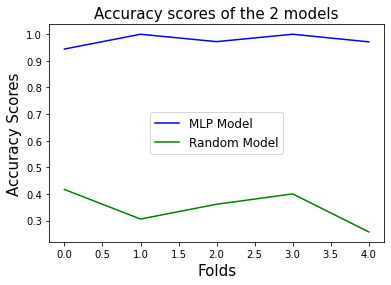

In [82]:
plt.plot(range(len(scores1)), scores1, label = "MLP Model", color = "blue")
plt.plot(range(len(scores2)), scores2, label = "Random Model", color = "green")
plt.title("Accuracy scores of the 2 models", fontsize = 15)
plt.ylabel("Accuracy Scores", fontsize = 15)
plt.xlabel("Folds", fontsize = 15)
plt.legend(loc="center", fontsize=12)
plt.show

In [ ]:
### Apologies, but I really wasn't able to do this problem without using sklearn. ###

In [ ]:
### References: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html ###
### https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/ ###
###https://www.journaldev.com/45109/normalize-data-in-python ###
### https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/#:~:text=A%20legend%20is%20an%20area,best%E2%80%9D%20(upper%20left). ###